In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv('complete_dataset_demo_rp.csv')
data0.head()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [3]:
data0.shape

(20000, 8)

In [5]:
data0.columns

Index(['Have_IP', 'Have_At', 'Sub_domains', 'Redirection', 'https_Domain',
       'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        20000 non-null  int64
 1   Have_At        20000 non-null  int64
 2   Sub_domains    20000 non-null  int64
 3   Redirection    20000 non-null  int64
 4   https_Domain   20000 non-null  int64
 5   TinyURL        20000 non-null  int64
 6   Prefix/Suffix  20000 non-null  int64
 7   Label          20000 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [7]:
data0.describe()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.004300,0.027850,0.108850,0.003800,0.000050,0.100700,0.130200,0.500000
std,0.065435,0.164547,0.311459,0.061528,0.007071,0.300939,0.336532,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Shuffling the data
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,1


In [15]:
#Splitting the data
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 7), (20000,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 7), (4000, 7))

In [17]:
#Using Random forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [18]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
# y_train_forest[:10]

In [19]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.656
Random forest: Accuracy on test Data: 0.649


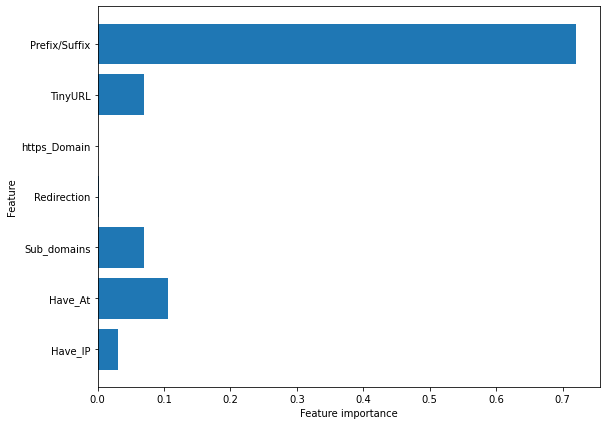

In [20]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
import joblib

In [22]:
joblib.dump(forest, 'RandomForrest_Model_report_demo.pkl')

['RandomForrest_Model_report_demo.pkl']

In [32]:

# 1.Checks for IP address in URL (Have_IP)
def havingIP(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)    
    if match:
        return 1 
    else:
        return 0
     


# 2.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    if "@" in url:
        at = 1    
    else:
        at = 0    
    return at


# #3.Finding the length of URL and categorizing (URL_Length)
# def getLength(url):
#     if len(url) < 54:
#         length = 0            
#     else:
#         length = 1  
#     return length


# 4.Finding the number of subdomains
def getSub_domains(url):
    if url.count(".") < 4:
        return 0                  
    else:
        return 1 



# 5.Checking for redirection '//' in the url (Redirection)

def redirection(url):
    if "//" in urlparse(url).path:
        return 1           
    else:
        return 0 


# 6.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0



shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
# 7. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
    
    
# 8.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            
    else:
        return 0   
    
    
#Function to extract features
def featureExtraction(url):
    features = []
    features.append(havingIP(url))
    features.append(haveAtSign(url))
#     features.append(getLength(url))
    features.append(getSub_domains(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))
#     features.append(label)  
    return features

In [ ]:
legi_features = []
url="http://www.g.o-og.le.com/"

legi_features.append(featureExtraction(url))
legi_features
a=legi_features
b=forest.predict(a)
b,legi_features